**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***Importing Dataset***

In [ ]:
dataset_path = '/content/sentiment_tweets3.csv'
df = pd.read_csv(dataset_path)
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


***Renaming Features***

In [ ]:
df = df.rename(columns = {"message to examine" : "Text", "label (depression result)" : "Sentiment"})
df.head()

,Index,Text,Sentiment
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


***Checking Shape of Dataset***

In [ ]:
df.shape

(10314, 3)

***Droping Index Feature***

In [ ]:
df = df[["Text", "Sentiment"]]
df.head()

,Text,Sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       10314 non-null  object
 1   Sentiment  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


***Checking Null Values***

In [ ]:
df.isna().sum()

Text         0
Sentiment    0
dtype: int64

***Plotting Sentiments***

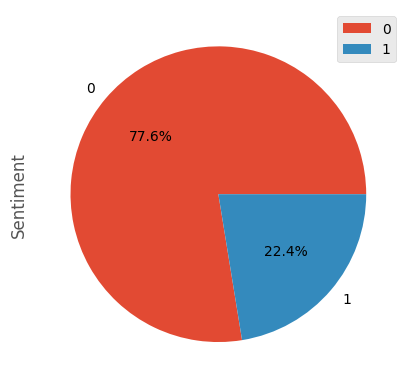

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

category_counts = df['Sentiment'].value_counts()
labels = category_counts.index.tolist()

category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.legend(labels, loc='best')
plt.show()

***Checking Duplicate Values***

In [ ]:
df.duplicated().sum()

31

***Dropping Duplicated Values***

In [ ]:
df.drop_duplicates()

,Text,Sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


***Checking Unique Values***

In [ ]:
df["Sentiment"].unique()

array([0, 1])

***Checking Sentiment Values***

In [ ]:
df["Sentiment"] = df["Sentiment"].replace(0, "Not Depressed")
df["Sentiment"] = df["Sentiment"].replace(1, "Depressed")
df["Sentiment"].value_counts()

Not Depressed    8000
Depressed        2314
Name: Sentiment, dtype: int64

***Plotting Sentiment Count***

Text(0.5, 1.0, 'Counts of Sentiment (Either Depressed or Not)')

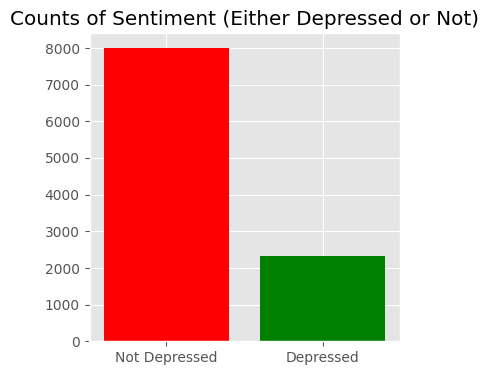

In [ ]:
fig = plt.figure(figsize = (4,4))
plt.bar(df["Sentiment"].unique(), df["Sentiment"].value_counts(),
        color = ['red', 'green'])
plt.title("Counts of Sentiment (Either Depressed or Not)")

***Sentiment Distribution***

Text(0.5, 1.0, 'Sentiment distribution')

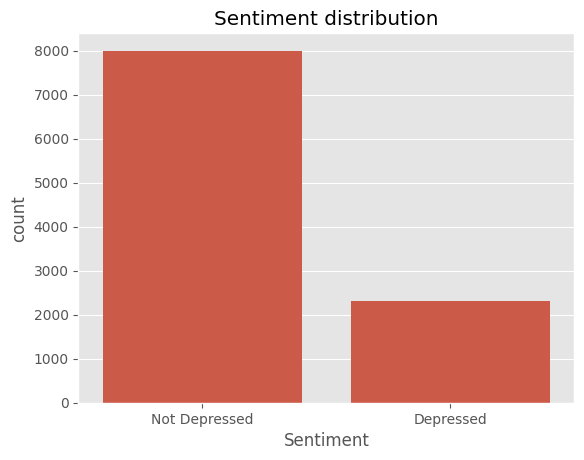

In [ ]:
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment distribution")

***Checking Sentiment Based Texts***

In [ ]:
for i in range(5):
    print("Text: ", [i])
    print(df['Text'].iloc[i], "\n")
    print("Sentiment: ", df['Sentiment'].iloc[i], "\n\n")

Text:  [0]
just had a real good moment. i missssssssss him so much,  

Sentiment:  Not Depressed 


Text:  [1]
is reading manga  http://plurk.com/p/mzp1e 

Sentiment:  Not Depressed 


Text:  [2]
@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8  

Sentiment:  Not Depressed 


Text:  [3]
@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.  

Sentiment:  Not Depressed 


Text:  [4]
ADD ME ON MYSPACE!!!  myspace.com/LookThunder 

Sentiment:  Not Depressed 




***Counting Text Words***

In [ ]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [ ]:
df['word count'] = df['Text'].apply(no_of_words)

In [ ]:
df.head()

,Text,Sentiment,word count
0,just had a real good moment. i missssssssss hi...,Not Depressed,11
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,4
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,4
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,22
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,5


***Plotting Sentiment Text Words***

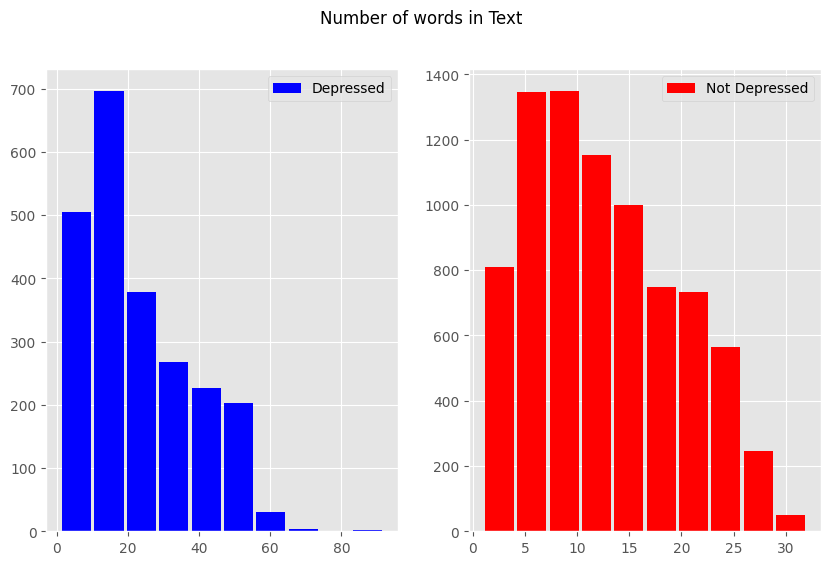

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['Sentiment'] == 'Depressed']['word count'], label='Depressed', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['Sentiment'] == 'Not Depressed']['word count'], label='Not Depressed', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in Text")
plt.show()

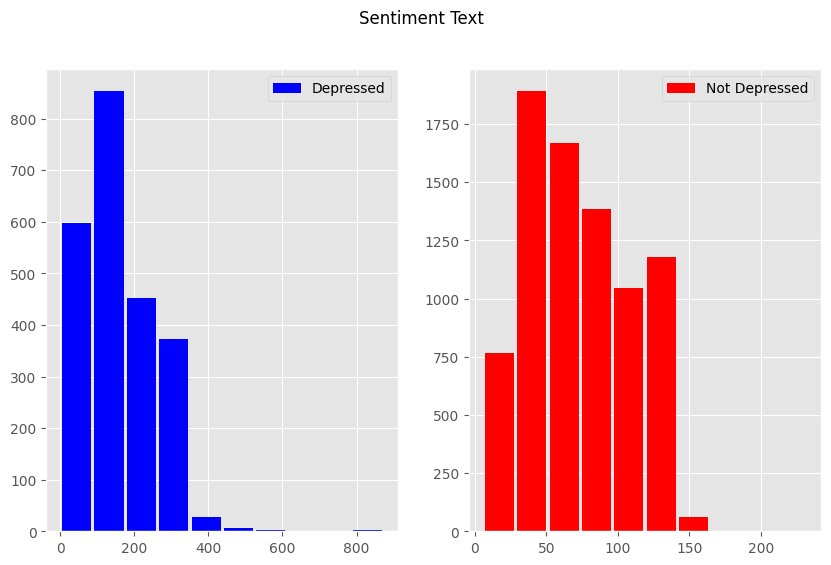

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['Sentiment'] == 'Depressed']['Text'].str.len(), label='Depressed', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['Sentiment'] == 'Not Depressed']['Text'].str.len(), label='Not Depressed', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Sentiment Text")
plt.show()

***Replacing Sentiments***

In [ ]:
df.Sentiment.replace("Depressed", 1, inplace=True)
df.Sentiment.replace("Not Depressed", 2, inplace=True)

In [ ]:
df.head()

,Text,Sentiment,word count
0,just had a real good moment. i missssssssss hi...,2,11
1,is reading manga http://plurk.com/p/mzp1e,2,4
2,@comeagainjen http://twitpic.com/2y2lx - http:...,2,4
3,@lapcat Need to send 'em to my accountant tomo...,2,22
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,2,5


***Importing Libraries***

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

***Conversion to Lower Case***

In [ ]:
df["Text"] = df["Text"].str.lower()
df.head()

,Text,Sentiment,word count
0,just had a real good moment. i missssssssss hi...,2,11
1,is reading manga http://plurk.com/p/mzp1e,2,4
2,@comeagainjen http://twitpic.com/2y2lx - http:...,2,4
3,@lapcat need to send 'em to my accountant tomo...,2,22
4,add me on myspace!!! myspace.com/lookthunder,2,5


***Stop Words***

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop = stopwords.words('english')
df["Text"] = df["Text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Text,Sentiment,word count
0,"real good moment. missssssssss much,",2,11
1,reading manga http://plurk.com/p/mzp1e,2,4
2,@comeagainjen http://twitpic.com/2y2lx - http:...,2,4
3,@lapcat need send 'em accountant tomorrow. odd...,2,22
4,add myspace!!! myspace.com/lookthunder,2,5


***Removing URLs***

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['Text'] = df['Text'].apply(remove_urls)

df.head()

,Text,Sentiment,word count
0,"real good moment. missssssssss much,",2,11
1,reading manga,2,4
2,@comeagainjen -,2,4
3,@lapcat need send 'em accountant tomorrow. odd...,2,22
4,add myspace!!! myspace.com/lookthunder,2,5


***Cleaning Punctuation***

In [ ]:
import string
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['Text']= df['Text'].apply(lambda x: clean_punctuations(x))
df.head()

,Text,Sentiment,word count
0,real good moment missssssssss much,2,11
1,reading manga,2,4
2,comeagainjen,2,4
3,lapcat need send em accountant tomorrow oddly ...,2,22
4,add myspace myspacecomlookthunder,2,5


***Cleaning Repeated Character***

In [ ]:
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
df['Text']= df['Text'].apply(lambda x: clean_repeating_char(x))
df.head()

,Text,Sentiment,word count
0,real good moment miss much,2,11
1,reading manga,2,4
2,comeagainjen,2,4
3,lapcat need send em accountant tomorrow oddly ...,2,22
4,add myspace myspacecomlookthunder,2,5


***Cleaning Numbers***

In [ ]:
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Text']= df['Text'].apply(lambda x: clean_numbers(x))
df.head()

,Text,Sentiment,word count
0,real good moment miss much,2,11
1,reading manga,2,4
2,comeagainjen,2,4
3,lapcat need send em accountant tomorrow oddly ...,2,22
4,add myspace myspacecomlookthunder,2,5


***Removing Hashtags***

In [ ]:
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
df['Text']= df['Text'].apply(lambda x: remove_hashtag(x))
df.head()

,Text,Sentiment,word count
0,real good moment miss much,2,11
1,reading manga,2,4
2,comeagainjen,2,4
3,lapcat need send em accountant tomorrow oddly ...,2,22
4,add myspace myspacecomlookthunder,2,5


***Terminating Username***

In [ ]:
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
df['Text']= df['Text'].apply(lambda x: clean_username(x))
df.head()

,Text,Sentiment,word count
0,real good moment miss much,2,11
1,reading manga,2,4
2,comeagainjen,2,4
3,lapcat need send em accountant tomorrow oddly ...,2,22
4,add myspace myspacecomlookthunder,2,5


***Cleaning Text***

In [ ]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
df.Text = df['Text'].apply(data_processing)

***Stemming***

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
df.Text = df['Text'].apply(lambda x: stemming(x))

In [ ]:
df['word count'] = df['Text'].apply(no_of_words)
df.head()

,Text,Sentiment,word count
0,real good moment miss much,2,5
1,reading manga,2,2
2,comeagainjen,2,1
3,lapcat need send em accountant tomorrow oddly ...,2,13
4,add myspace myspacecomlookthunder,2,3


***Looking for Sentiments***

In [ ]:
Depressed_Text =  df[df.Sentiment == 1]
Depressed_Text.head()

,Text,Sentiment,word count
8000,lack understanding small significant part caus...,1,16
8001,told parents depression hard get gen x people ...,1,17
8002,depression something speak even going also dou...,1,27
8003,made tortilla filled pbj depression cured oliv...,1,8
8004,worldofoutlaws gon na need depression meds soo...,1,21


In [ ]:
Not_Depressed_Text =  df[df.Sentiment == 2]
Not_Depressed_Text.head()

,Text,Sentiment,word count
0,real good moment miss much,2,5
1,reading manga,2,2
2,comeagainjen,2,1
3,lapcat need send em accountant tomorrow oddly ...,2,13
4,add myspace myspacecomlookthunder,2,3


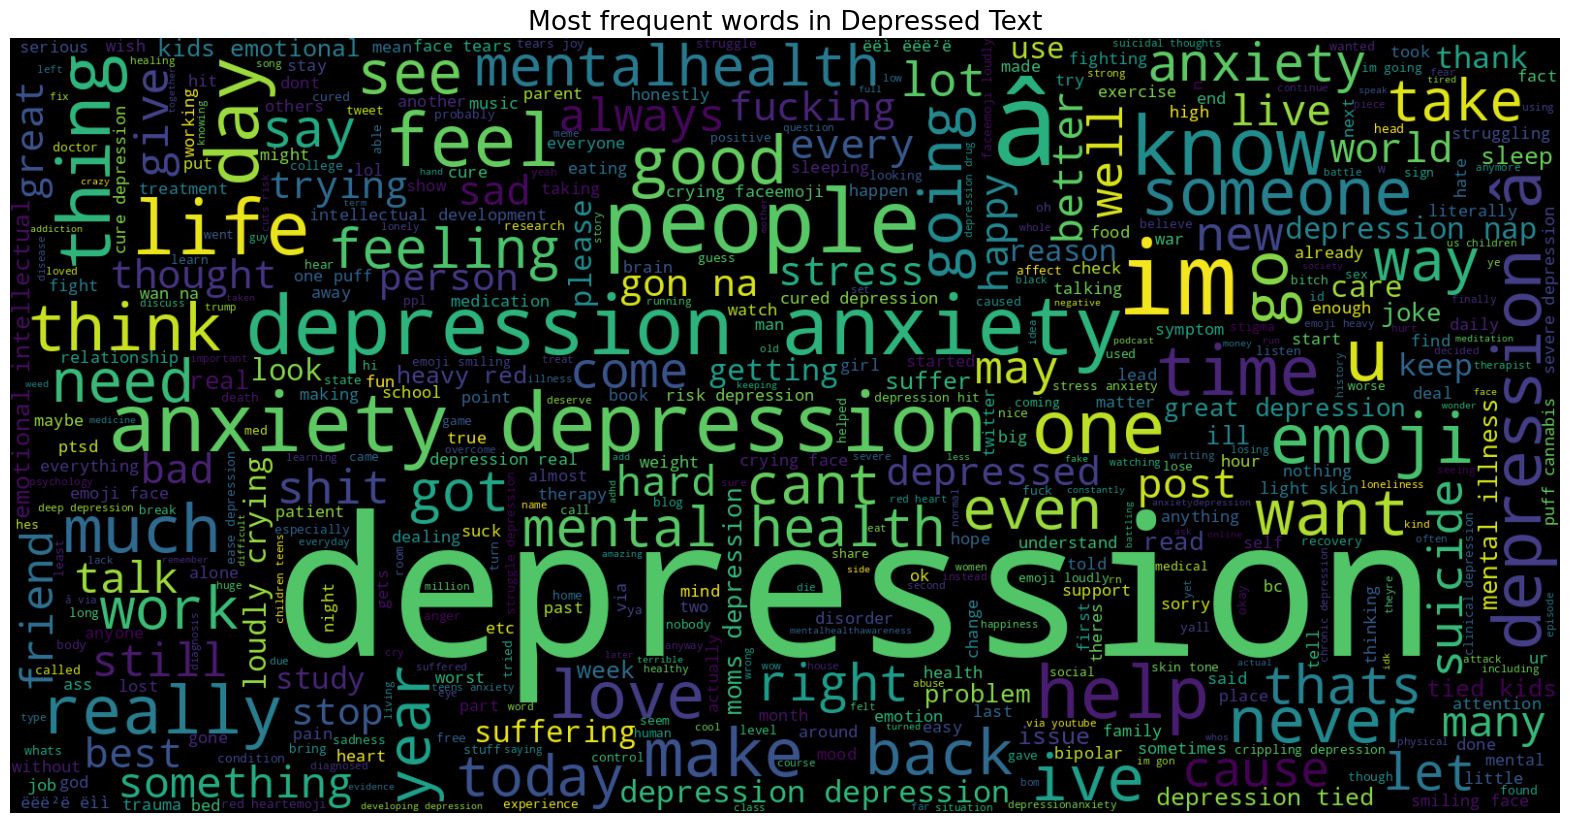

In [ ]:
text = ' '.join([word for word in Depressed_Text['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Depressed Text', fontsize = 19)
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in Depressed_Text['Text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('depression', 2287),
 ('â', 407),
 ('anxiety', 359),
 ('im', 263),
 ('like', 201),
 ('emoji', 192),
 ('face', 165),
 ('people', 160),
 ('know', 131),
 ('life', 125),
 ('get', 118),
 ('one', 117),
 ('mental', 110),
 ('feel', 100),
 ('time', 94)]

In [ ]:
Depressed_Text = pd.DataFrame(count.most_common(15))
Depressed_Text.columns = ['word', 'count']
Depressed_Text.head()

,word,count
0,depression,2287
1,â,407
2,anxiety,359
3,im,263
4,like,201


In [ ]:
px.bar(Depressed_Text, x='count', y='word', title='Common words in Depressed Text', color = 'word')

In [ ]:
Not_Depressed_Text =  df[df.Sentiment == 2]
Not_Depressed_Text.head()

,Text,Sentiment,word count
0,real good moment miss much,2,5
1,reading manga,2,2
2,comeagainjen,2,1
3,lapcat need send em accountant tomorrow oddly ...,2,13
4,add myspace myspacecomlookthunder,2,3


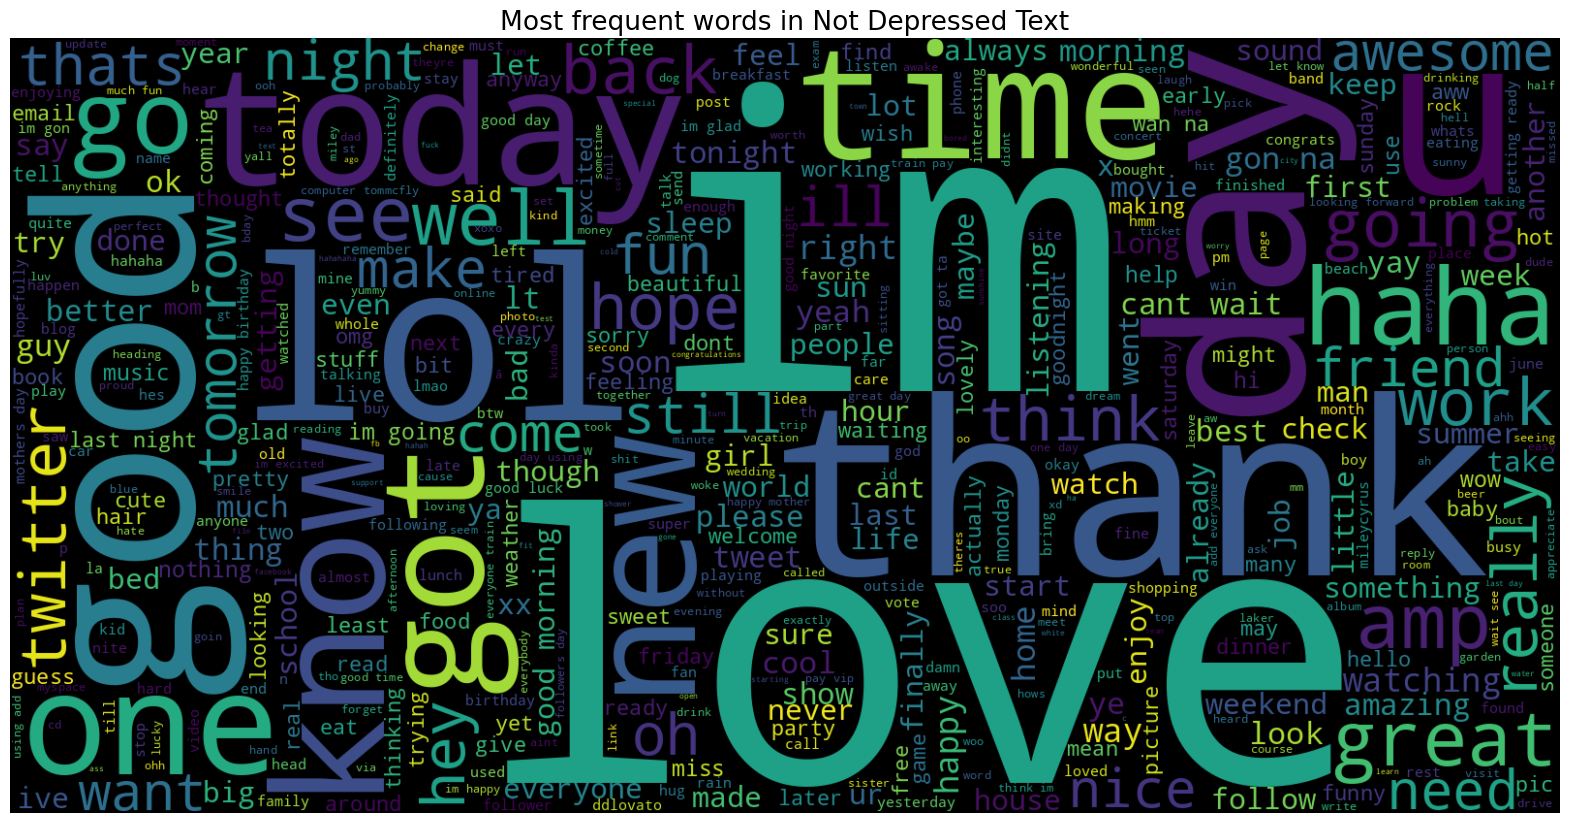

In [ ]:
text = ' '.join([word for word in Not_Depressed_Text['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Not Depressed Text', fontsize = 19)
plt.show()

In [ ]:
count = Counter()
for text in Not_Depressed_Text['Text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('im', 773),
 ('good', 614),
 ('day', 485),
 ('love', 472),
 ('lol', 377),
 ('get', 366),
 ('like', 352),
 ('thanks', 340),
 ('time', 305),
 ('got', 304),
 ('today', 299),
 ('u', 292),
 ('going', 290),
 ('go', 282),
 ('know', 272)]

In [ ]:
Not_Depressed_Text = pd.DataFrame(count.most_common(15))
Not_Depressed_Text.columns = ['word', 'count']
Not_Depressed_Text.head()

,word,count
0,im,773
1,good,614
2,day,485
3,love,472
4,lol,377


In [ ]:
px.bar(Not_Depressed_Text, x='count', y='word', title='Common words in Not Depressed Text', color = 'word')